# Problem Statement

To predict future ODI cricket match winner based on previous year's match result.

# Introduction

- Cricket is one of the most popular sports in world, especially in India. The game is highly uncertain.
- It is the sport which generate high revenue.
- What if the winner team of the match can be predicted before the match, even have begin?
- Because we are predicting a output which is categorical value, that is the probelm is a classification problem.

## Dataset Desciption

The dataset folder contains the following file:

ODI-data-1971-2017.csv = 3932 rows x 7 columns

Columns Provided in the Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date

ODI-data-2017-2021.csv = 495 x 8 columns

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

# For this problem we will be using samples from 2010 to 2021.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the datasets ODI_data_1971_2017 and ODI_data_2017_2021
odi_71_17=pd.read_csv('ODI-data-1971-2017.csv')
odi_17_21=pd.read_csv('ODI-Data-2017-2021.csv')

In [3]:
# ODI_data_1971_2017 data
odi_71_17.head(5)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [4]:
odi_71_17.shape

(3932, 7)

In [5]:
odi_17_21.shape

(495, 8)

In [6]:
a=odi_17_21.drop('Unnamed: 0',axis=1)
b=pd.concat([odi_71_17,a],axis=0)
b.index=[i for i in range(len(b))]

Droping rows of year 2017 pesent in ODI 2017 to 2021 dataset wich are alredy present in ODI 1971 to 2017 data

In [7]:
b.loc[b.duplicated()][:]

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
3932,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
3933,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
3934,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3935,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
3936,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"
...,...,...,...,...,...,...,...
4043,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
4044,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
4045,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
4046,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [8]:
b.loc[b.duplicated()][:].index

Int64Index([3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941,
            ...
            4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047],
           dtype='int64', length=109)

In [9]:
b.shape

(4427, 7)

In [10]:
b=b.drop(index=b.loc[b.duplicated()][:].index)
b.shape

(4318, 7)

In [11]:
b.index=[i for i in range(len(b))]
odi_71_21=b.copy()

In [12]:
# Load ODI_data_1971_2021 the dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(odi_71_21)

       Scorecard        Team 1        Team 2        Winner           Margin  \
0        ODI # 1     Australia       England     Australia        5 wickets   
1        ODI # 2       England     Australia       England        6 wickets   
2        ODI # 3       England     Australia     Australia        5 wickets   
3        ODI # 4       England     Australia       England        2 wickets   
4        ODI # 5   New Zealand      Pakistan   New Zealand          22 runs   
5        ODI # 6       England   New Zealand       England        7 wickets   
6        ODI # 7       England   New Zealand     no result              NaN   
7        ODI # 8       England   West Indies       England         1 wicket   
8        ODI # 9       England   West Indies   West Indies        8 wickets   
9       ODI # 10   New Zealand     Australia     Australia        7 wickets   
10      ODI # 11   New Zealand     Australia     Australia          31 runs   
11      ODI # 12       England         India       E

In [13]:
int(odi_71_21.loc[0]['Match Date'][-4:])

1971

In [14]:
len(odi_71_21)

4318

In [15]:
#index of odi_17_21 whch have there year greater than eqal to 2010
c=odi_71_21.index[[i for i in range(len(odi_71_21)) if(int(odi_71_21.loc[i]['Match Date'][-4:])>=2010)]]
c

Int64Index([2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945,
            ...
            4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317],
           dtype='int64', length=1382)

In [16]:
odi_10_21=odi_71_21.loc[[i for i in range(len(odi_71_21)) if(int(odi_71_21.loc[i]['Match Date'][-4:])>=2010)]]

In [17]:
# Reset index of the new dataframe
odi_10_21.index=[i for i in range(len(odi_10_21))]

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [18]:
# Check all column names
odi_10_21.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [19]:
# Check info of complete dataset
odi_10_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 1381
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1382 non-null   object
 1   Team 1      1382 non-null   object
 2   Team 2      1382 non-null   object
 3   Winner      1382 non-null   object
 4   Margin      1333 non-null   object
 5   Ground      1382 non-null   object
 6   Match Date  1382 non-null   object
dtypes: object(7)
memory usage: 86.4+ KB


After checking the Dtypes of all the columns 
  1. object - String values
  3. All the columns are of string datatype

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [20]:
# For more information on the dataset like the total count in all the columns
odi_10_21.describe()
#For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq.
#The top is the most common value.
#The freq is the most common value’s frequency.
#Timestamps also include the first and last items.

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1382,1382,1382,1382,1333,1382,1382
unique,1375,23,23,25,216,124,1150
top,ODI # 3895,England,Pakistan,India,6 wickets,Dhaka,"Jul 10, 2010"
freq,2,142,175,164,126,87,4


## Get the total number of samples in the dataset using the len() function

In [21]:
# print len of the datset 
len(odi_10_21)

1382

## Get unique values

In [22]:
# loop through datatset to find count of unique values of each column
odi_10_21.nunique()

Scorecard     1375
Team 1          23
Team 2          23
Winner          25
Margin         216
Ground         124
Match Date    1150
dtype: int64

In [23]:
#checking why scorecaard vale is unique or not?
a=odi_10_21.Scorecard.values
b=np.sort(a,axis=0)
for i in range(len(b)):
    if(b[i-1]==b[i]):
        print(i-1,b[i-1])

919 ODI # 3856
930 ODI # 3866
941 ODI # 3876
945 ODI # 3879
957 ODI # 3890
963 ODI # 3895
982 ODI # 3913


## Counting the total number of missing values

In [24]:
# Check for missing values in all the columnns of the dataset
odi_10_21.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

By the observation gather from the ODI_data_2010_2021.info() , we can know there are missing values in the "Margin" column of dataset

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [25]:
# Import necessary libraries needed for performing Chi-square test
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [26]:
# Helper function for performing chi-square test
def chi_func_2(i,j):
    #Contingency Table
    tab=pd.crosstab(i,j)

    #Observed Values
    ov=tab.values
    ov

    #Expected Values
    val=chi2_contingency(observed=tab)
    ev=val[3]

    #Degree of Freedom
    dof=(tab.shape[0]-1)*(tab.shape[1]-1) #same as val[2]

    #Significance Level 5%
    alpha=0.05

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=dof)

    #p-value
    p_value=val[1]

    #chi_2_statsitics
    chi_2_statistic=(((ov-ev)**2)/ev).sum() #same as val[0]

    print('Degree of Freedom',dof,'\n')

    print('Significance level',alpha)
    print('p_value',p_value,'\n')

    print('chi_square_statistic',chi_2_statistic)
    print('critical_value',critical_value,'\n')

    #condition based on chi_square_statistic and critical value for hypothesis rejection     
    if(chi_2_statistic<critical_value):
        print('chi_2_statistic<critical_value')
        print('Accept Ho')
        print('NO relation b/w 2 categorical variables\n')   
    else:
        print('chi_2_statistic>critical_value')
        print('Reject Ho')
        print('relation b/w 2 categorical variables\n')

    # check condition based on p value and alpha for hypothesis rejection  
    if(p_value>alpha):
        print('p_value>alpha')
        print('Accept Ho')
        print('NO relation b/w 2 categorical variables')
    else:
        print('p_value<alpha')
        print('Reject Ho')
        print('relation b/w 2 categorical variables\n')
    print('\n***************************************************\n')

In [27]:
odi_10_21.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

In [28]:
for i in odi_10_21.columns:
    for j in odi_10_21.columns:
        if(i!=j):
            print(i,j,'\n')
            chi_func_2(odi_10_21[str(i)],odi_10_21[str(j)])

Scorecard Team 1 

Degree of Freedom 30228 

Significance level 0.05
p_value 0.2366476769714661 

chi_square_statistic 30404.0
critical_value 30633.567183419527 

chi_2_statistic<critical_value
Accept Ho
NO relation b/w 2 categorical variables

p_value>alpha
Accept Ho
NO relation b/w 2 categorical variables

***************************************************

Scorecard Team 2 

Degree of Freedom 30228 

Significance level 0.05
p_value 0.2366476769714661 

chi_square_statistic 30404.0
critical_value 30633.567183419527 

chi_2_statistic<critical_value
Accept Ho
NO relation b/w 2 categorical variables

p_value>alpha
Accept Ho
NO relation b/w 2 categorical variables

***************************************************

Scorecard Winner 

Degree of Freedom 32976 

Significance level 0.05
p_value 0.22699506150038504 

chi_square_statistic 33168.0
critical_value 33399.55082702824 

chi_2_statistic<critical_value
Accept Ho
NO relation b/w 2 categorical variables

p_value>alpha
Accept Ho
NO re

Degree of Freedom 27576 

Significance level 0.05
p_value 0.9986213979586139 

chi_square_statistic 26878.277437329212
critical_value 27963.418723067858 

chi_2_statistic<critical_value
Accept Ho
NO relation b/w 2 categorical variables

p_value>alpha
Accept Ho
NO relation b/w 2 categorical variables

***************************************************

Margin Scorecard 

Degree of Freedom 286380 

Significance level 0.05
p_value 0.3878614233173161 

chi_square_statistic 286594.9999999999
critical_value 287625.9761694759 

chi_2_statistic<critical_value
Accept Ho
NO relation b/w 2 categorical variables

p_value>alpha
Accept Ho
NO relation b/w 2 categorical variables

***************************************************

Margin Team 1 

Degree of Freedom 4730 

Significance level 0.05
p_value 0.8143645553189857 

chi_square_statistic 4642.910638456127
critical_value 4891.111561113719 

chi_2_statistic<critical_value
Accept Ho
NO relation b/w 2 categorical variables

p_value>alpha
Accept H

From above chi-square test:

There is correlation between Team 1 and Winner data.

## groupby

You can use groupby to chunk up your data into subsets for further analysis.

In [29]:
odi_10_21.head(5)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


In [30]:
odi_10_21.groupby('Team 1').count()

,Scorecard,Team 2,Winner,Margin,Ground,Match Date
Team 1,,,,,,
Afghanistan,75,75,75,75,75,75
Australia,127,127,127,120,127,127
Bangladesh,118,118,118,117,118,118
Canada,18,18,18,17,18,18
England,142,142,142,135,142,142
Hong Kong,14,14,14,14,14,14
India,134,134,134,131,134,134
Ireland,69,69,69,64,69,69
Kenya,13,13,13,13,13,13


<AxesSubplot:xlabel='Team 1'>

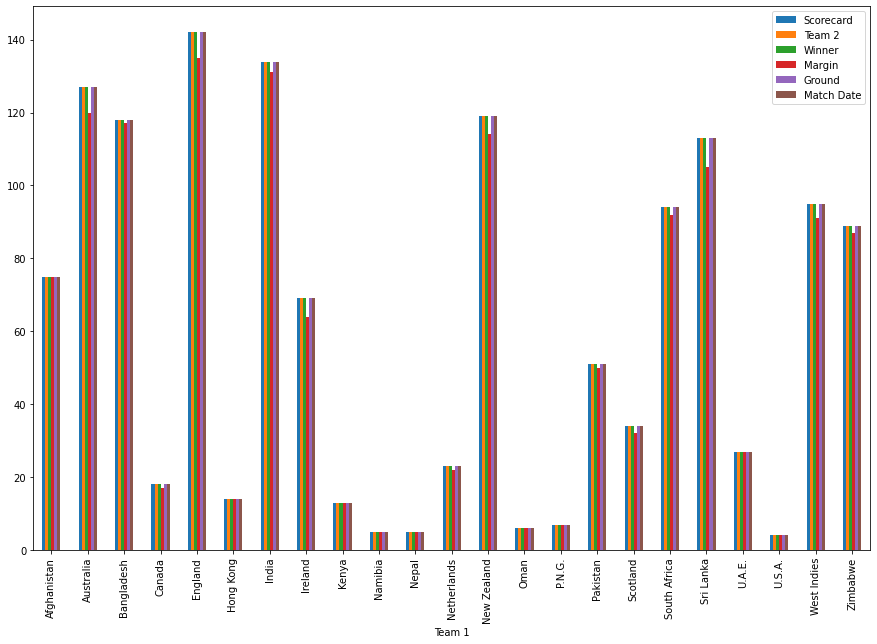

In [31]:
# group data by Team 1 and plot count plot
odi_10_21.groupby('Team 1').count().plot(kind='bar',figsize=(15,10))

from above graph:
1. There are more samples of team 1 as Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as compared to other teams
2. Samples of team 1 as  Namibia, Oman, Nepal, P.N.G, U.S.A are very less

<AxesSubplot:xlabel='Team 2'>

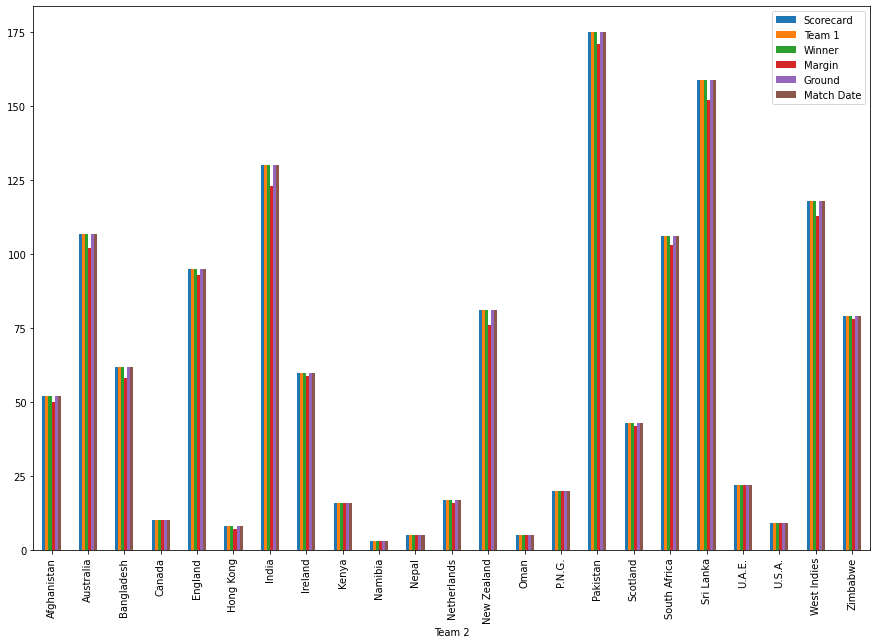

In [32]:
# group data by Team 2 and plot count plot
odi_10_21.groupby('Team 2').count().plot(kind='bar',figsize=(15,10))

from above graph:
1. There are more samples of team 2 as Afghanistan, Australia, Bangladesh, England, India, Pakistan, Ireland, New Zealand, West Indies, Sri Lanks, South Africa Zimbabwe as compared to other teams
2. Samples of team 2 as  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada are very less

In [33]:
# group data by Winner and plot count plot
odi_10_21.groupby('Winner').count()

,Scorecard,Team 1,Team 2,Margin,Ground,Match Date
Winner,,,,,,
Afghanistan,60,60,60,60,60,60
Australia,133,133,133,133,133,133
Bangladesh,81,81,81,81,81,81
Canada,5,5,5,5,5,5
England,133,133,133,133,133,133
Hong Kong,9,9,9,9,9,9
India,164,164,164,164,164,164
Ireland,54,54,54,54,54,54
Kenya,7,7,7,7,7,7


<AxesSubplot:xlabel='Winner'>

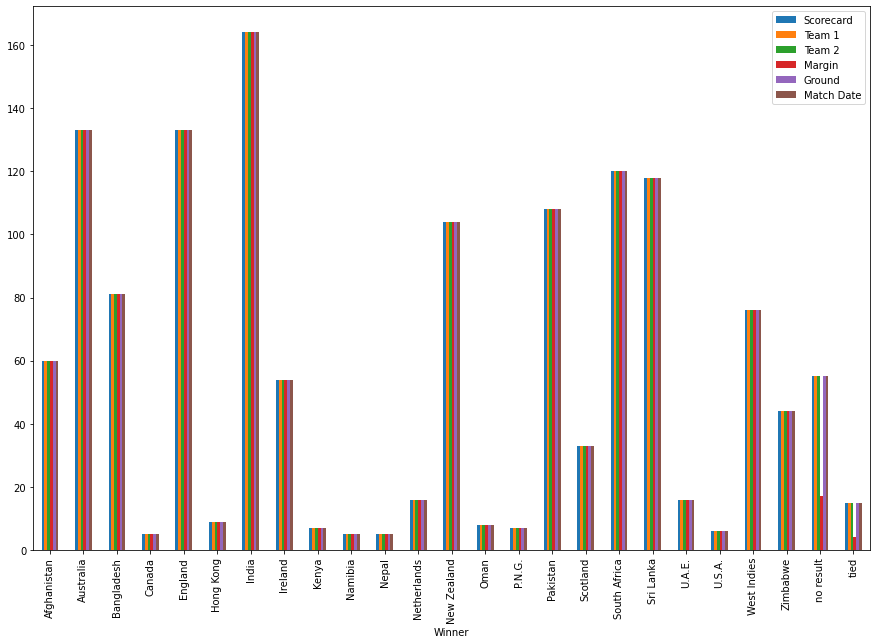

In [34]:
odi_10_21.groupby('Winner').count().plot(kind='bar',figsize=(15,10))

from above graph:
1. There are more samples of Winner as Australia, Bangladesh, England, India, Pakistan, New Zealand, West Indies, Zimbabwe, South Africa, Sri Lanka as compared to other teams
2. Samples of Winner as Canada, Hong Kong, Kenya, Namibia, Oman, Nepal, P.N.G, U.S.A are very less
3. Also there are many matches with no result nad few which were tied.

<AxesSubplot:xlabel='Ground'>

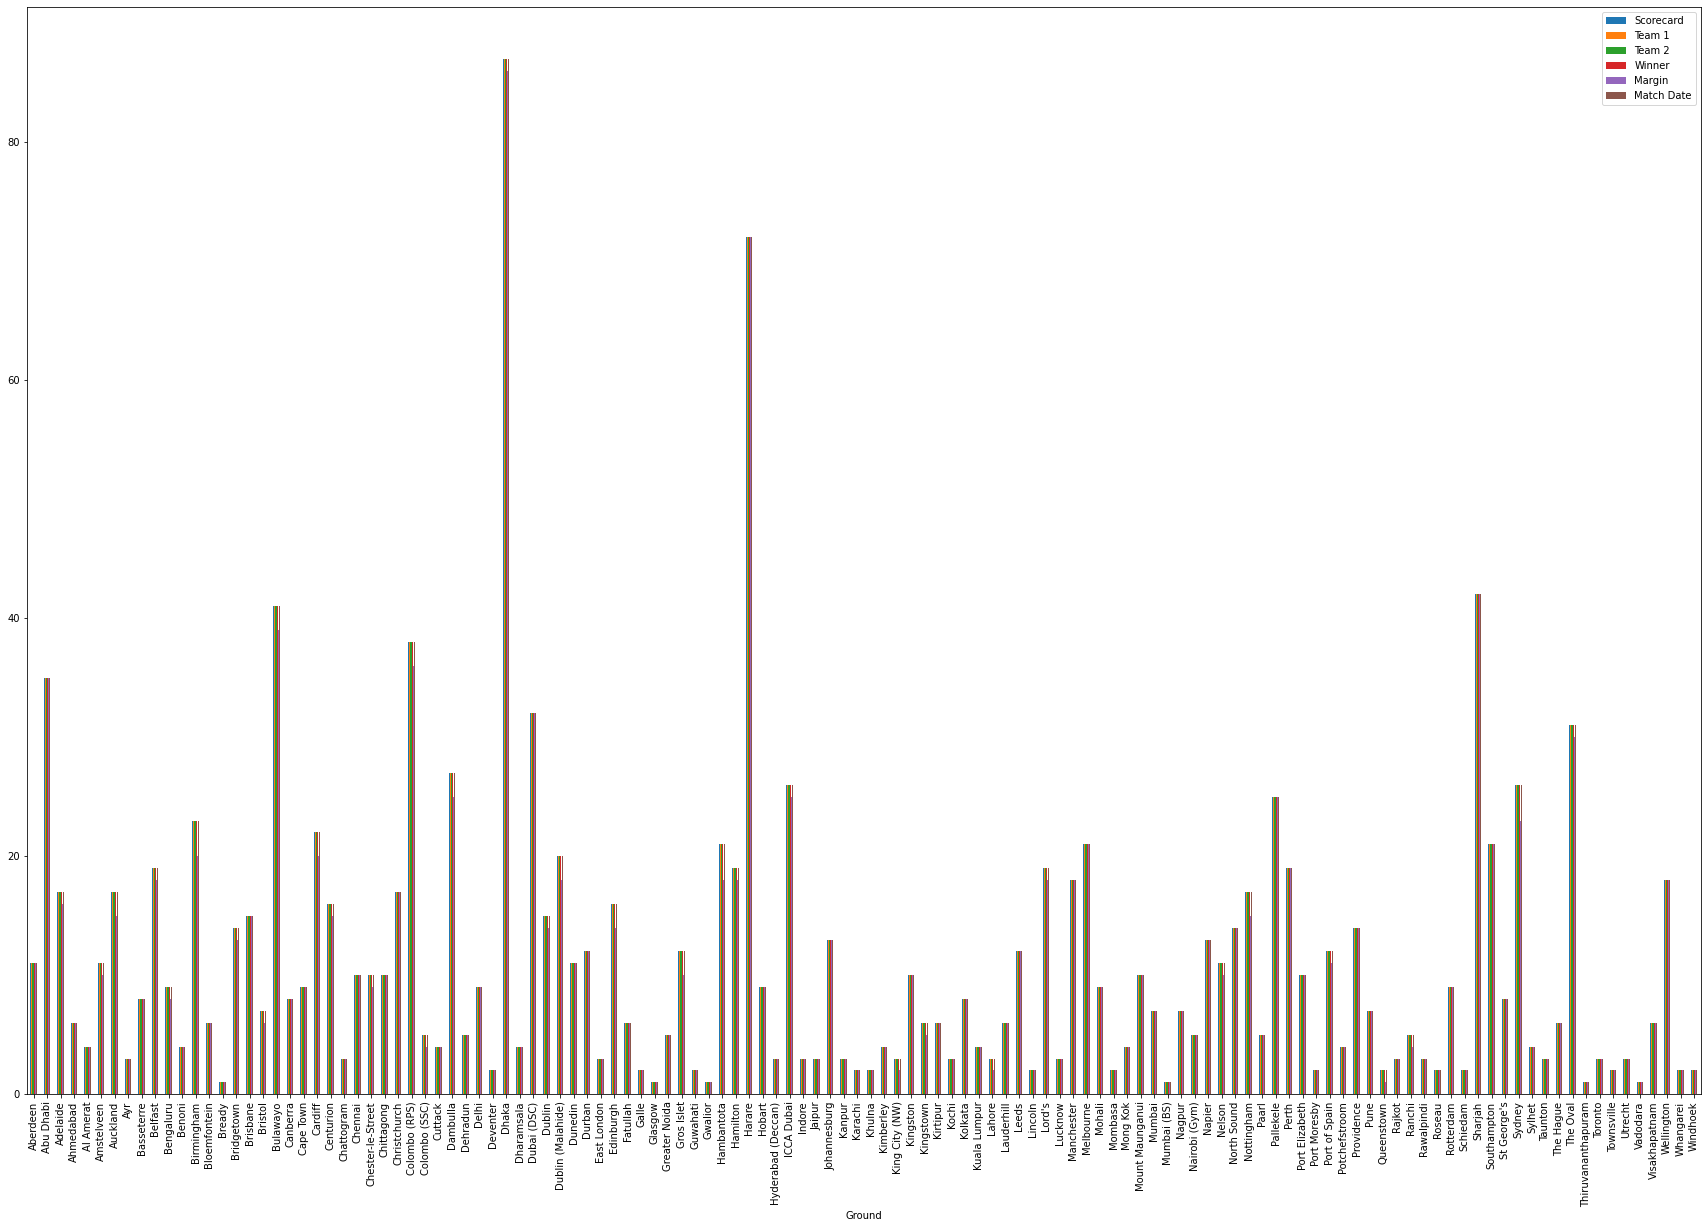

In [35]:
# group data by Ground and plot count plot
odi_10_21.groupby('Ground').count().plot(kind='bar',figsize=(30,20))

from above graph:
1. There are more samples of ground Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS), Sharjah

<AxesSubplot:xlabel='Margin'>

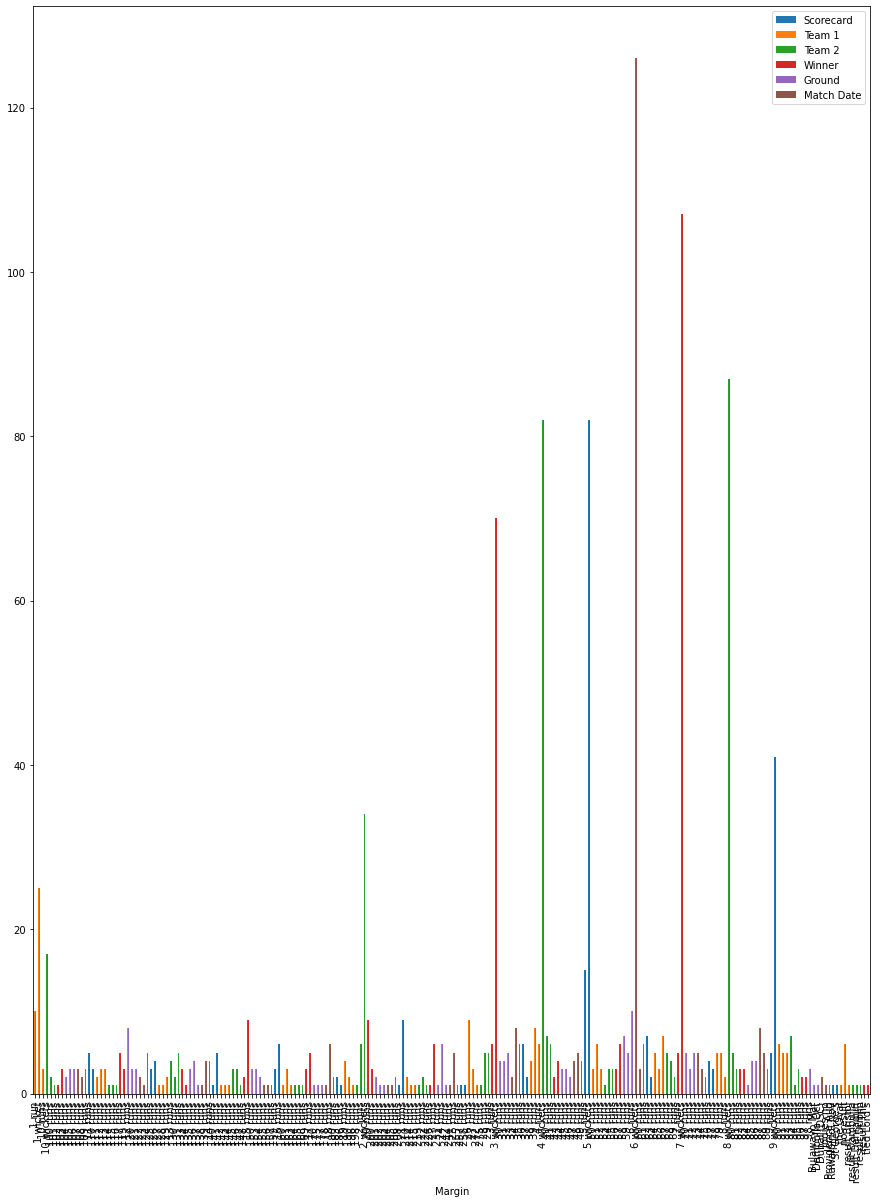

In [36]:
# group data by Margin and plot count plot
odi_10_21.groupby('Margin').count().plot(kind='bar',figsize=(15,20))

from above graph:
1. Few Matches margin are very high then other matches, we need two sclae these numbers.

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

<AxesSubplot:xlabel='Team 1', ylabel='count'>

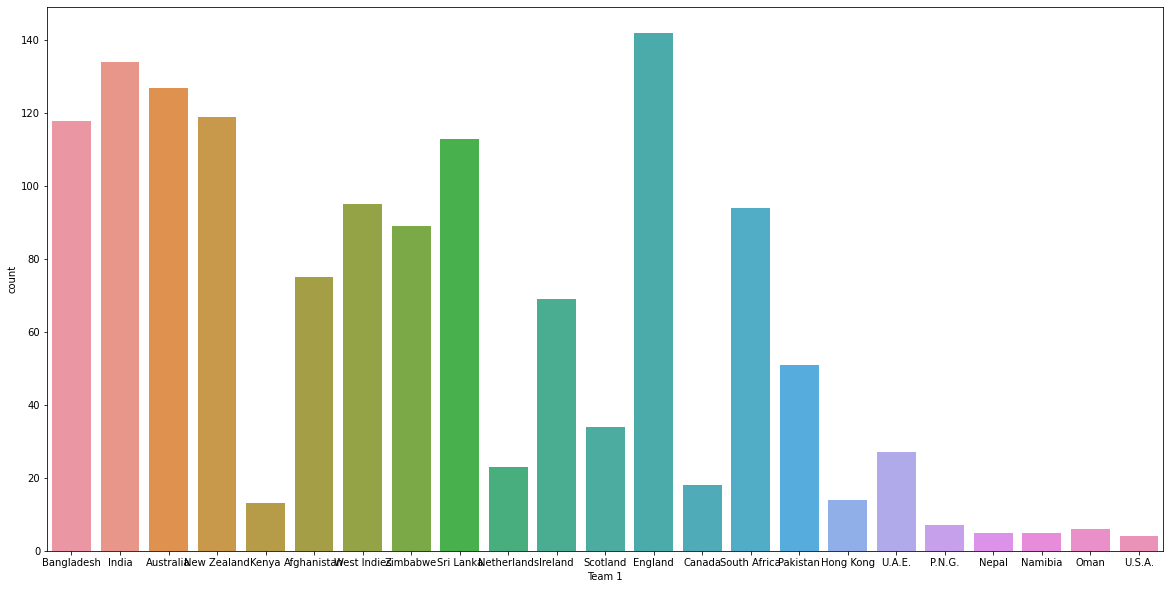

In [37]:
# count plot for Team 1 column
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x='Team 1',data=odi_10_21)

From above count plot

distribution of values of Team 1 is not equal over complete dataset, skewed left multimodel.

<AxesSubplot:xlabel='Team 2', ylabel='count'>

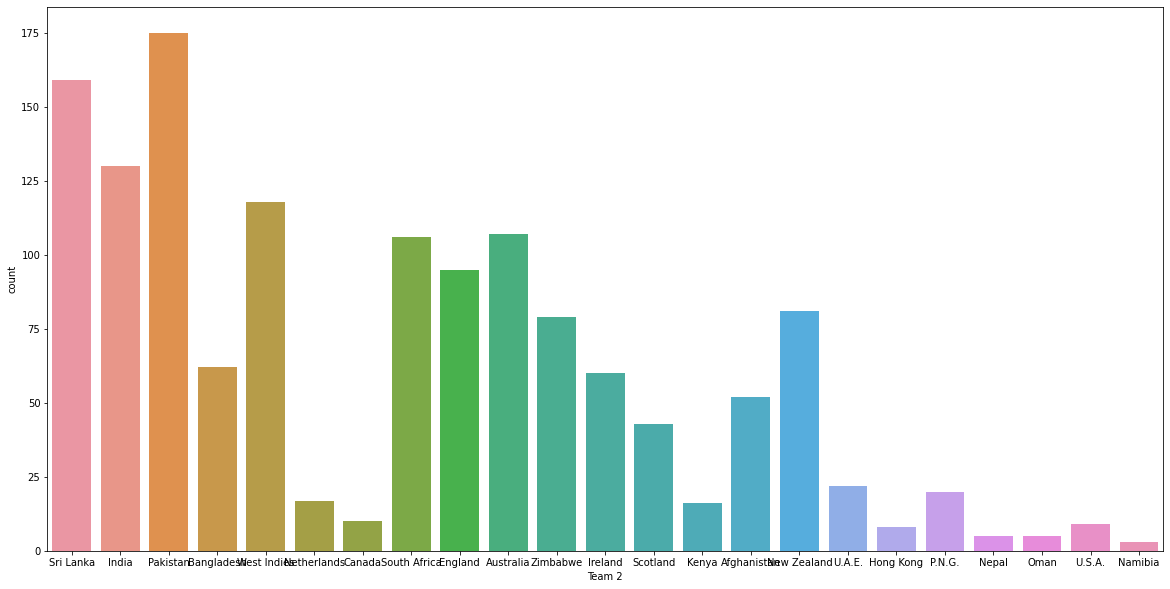

In [38]:
# count plot for Team 2 column
plt.figure(figsize=(20,10))
sns.countplot(x='Team 2',data=odi_10_21)

From above count plot

distribution of values of team 2 is not equal over complete dataset, skewed left.

<AxesSubplot:xlabel='Winner', ylabel='count'>

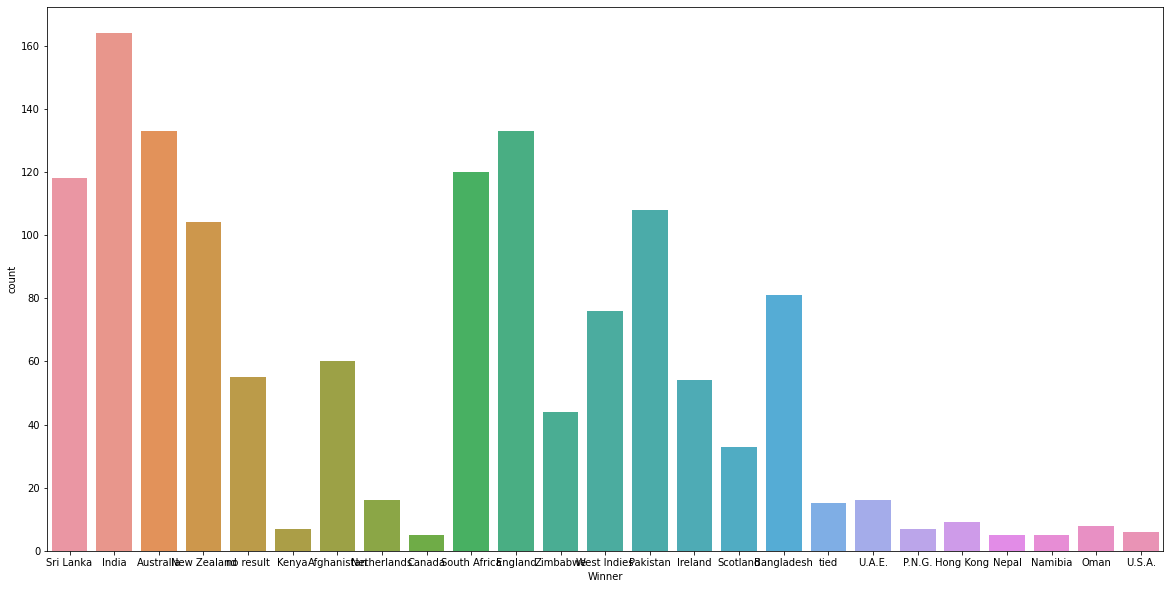

In [39]:
# count plot for Winner column
plt.figure(figsize=(20,10))
sns.countplot(data=odi_10_21,x='Winner')

From above count plot

distribution of values of winner teams is not equal over complete dataset, skewed left, multimodel.

<AxesSubplot:xlabel='Ground', ylabel='count'>

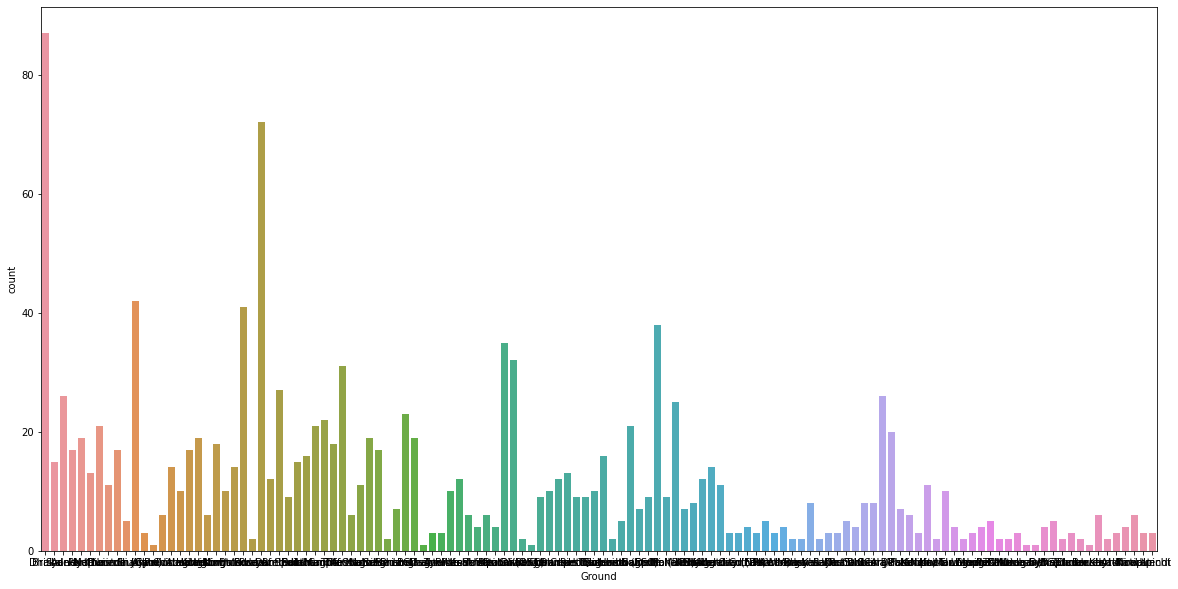

In [40]:
# count plot for Ground column
plt.figure(figsize=(20,10))
sns.countplot(data=odi_10_21,x='Ground')

From above count plot

distribution of values of ground is not equal over complete dataset, multimodel.

<AxesSubplot:xlabel='Margin', ylabel='count'>

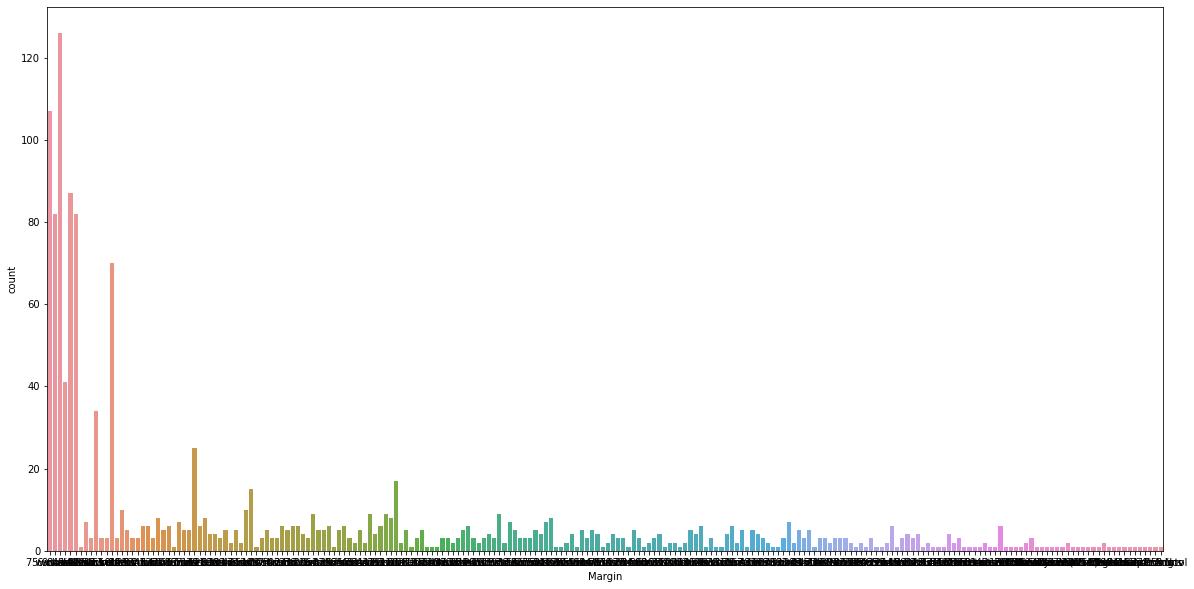

In [41]:
# count plot for Margin column
plt.figure(figsize=(20,10))
sns.countplot(data=odi_10_21,x='Margin')

From above count plot

distribution of values of Margin is not equal over complete dataset, skewed left.

## Since, there are missing values in Margin column of dataset

We need to drop those empty rows. Beacase all of the data is categorical and if we replace the missing values with random values it will affect the correctness of prediction.

In [42]:
# Droping rows with missing values
odi_10_21=odi_10_21.dropna()
# Reseting index of samples
odi_10_21.index=[i for i in range(len(odi_10_21))]
# Droping extra "index" column from dataset
odi_10_21

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"
...,...,...,...,...,...,...,...
1328,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021"
1329,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021"
1330,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021"
1331,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021"


In [43]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'
for i in range(len(odi_10_21)):
    if(odi_10_21.loc[i]['Winner']=='no result' or odi_10_21.loc[i]['Winner']=='tied'):
        odi_10_21=odi_10_21.drop(index=i)
# Rest index of the datframe
odi_10_21.index=[i for i in range(len(odi_10_21))]

In [44]:
odi_10_21.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311],
           dtype='int64', length=1312)

## Feature Engineering
It is one of the most important step in workflow of machine learning. Machine learning model work well if the data provided to the model is relevant and useful.

We can break down the
Margin column which is Object data type into two columns named Won by runs and won by wickets both are numerical datatype int64


In [45]:
odi_10_21.Margin

0       7 wickets
1       5 wickets
2       6 wickets
3       9 wickets
4       8 wickets
          ...    
1307    3 wickets
1308     133 runs
1309    4 wickets
1310    3 wickets
1311    6 wickets
Name: Margin, Length: 1312, dtype: object

In [46]:
runs=[]
runs_index=[]
wickets=[]
wickets_index=[]
for i in range(len(odi_10_21.Margin)):
    a=odi_10_21.Margin[i].split()
    if(a[1]=='wicket' or a[1]=='wickets'):
        wickets.append(int(a[0]))
        wickets_index.append(i)
    if(a[1]=='runs' or a[1]=='run'):
        runs.append(int(a[0]))
        runs_index.append(i)

In [47]:
odi_10_21['win_by_runs']=0
odi_10_21['win_by_wickets']=0
j=0
for i in runs_index:
    odi_10_21.loc[[i],['win_by_runs']]=runs[j]
    j+=1
j=0
for i in wickets_index:
    odi_10_21.loc[[i],['win_by_wickets']]=wickets[j]
    j+=1

In [48]:
odi_10_21.head(5)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,win_by_runs,win_by_wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8


# Further feature engineering

We can create a two new columns named team_1_first_batting and team_2_first_batting from Won_by_runs and Won_by_wickets

Explanation:
If a team wins by run it means that the team got first chance for batting else if a team wins by wickets that means the team got first chance for bowling.

In [49]:
team_1_first_batting=[]
team_1_first_batting_index=[]
team_2_first_batting=[]
team_2_first_batting_index=[]

for i in range(len(odi_10_21)):
    if(odi_10_21.loc[i]['Winner']==odi_10_21.loc[i]['Team 1']):
        if(odi_10_21.loc[i]['win_by_runs']!=0):
            team_1_first_batting.append(1)
            team_1_first_batting_index.append(i)
            team_2_first_batting.append(0)
            team_2_first_batting_index.append(i)
            
        if(odi_10_21.loc[i]['win_by_wickets']!=0):
            team_1_first_batting.append(0)
            team_1_first_batting_index.append(i)
            team_2_first_batting.append(1)
            team_2_first_batting_index.append(i)
            
    if(odi_10_21.loc[i]['Winner']==odi_10_21.loc[i]['Team 2']):
        if(odi_10_21.loc[i]['win_by_runs']!=0):
            team_2_first_batting.append(1)
            team_2_first_batting_index.append(i)
            team_1_first_batting.append(0)
            team_1_first_batting_index.append(i)
        if(odi_10_21.loc[i]['win_by_wickets']!=0):
            team_2_first_batting.append(0)
            team_2_first_batting_index.append(i)
            team_1_first_batting.append(1)
            team_1_first_batting_index.append(i)

In [50]:
odi_10_21['t1fb']=np.nan
odi_10_21['t2fb']=np.nan
j=0
for i in team_1_first_batting_index:
    odi_10_21.loc[[i],['t1fb']]=team_1_first_batting[j]
    j+=1
j=0
for i in team_2_first_batting_index:
    odi_10_21.loc[[i],['t2fb']]=team_2_first_batting[j]
    j+=1

In [51]:
odi_10_21

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,win_by_runs,win_by_wickets,t1fb,t2fb
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1.0,0.0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1.0,0.0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1.0,0.0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1.0,0.0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1.0,0.0
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0.0,1.0
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0.0,1.0
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0.0,1.0


In [52]:
odi_10_21_copy=odi_10_21

### Dealing with Multi Class Problem

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. It will reduce multiclass classification problem as using team name as label we the model have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [53]:
for i in range(len(odi_10_21)):
    if(odi_10_21.loc[i]['Winner']==odi_10_21.loc[i]['Team 1']):
        odi_10_21.loc[[i],['Winning Team']]=1
    if(odi_10_21.loc[i]['Winner']==odi_10_21.loc[i]['Team 2']):
        odi_10_21.loc[[i],['Winning Team']]=2

In [54]:
odi_10_21

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,win_by_runs,win_by_wickets,t1fb,t2fb,Winning Team
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1.0,0.0,2.0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1.0,0.0,2.0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1.0,0.0,2.0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1.0,0.0,2.0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1.0,0.0,2.0
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0.0,1.0,2.0
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0.0,1.0,1.0
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0.0,1.0,1.0


## Scaling

Scaling is very crucial part of teh workflow. 
As the data we have for example: 
Won_by_run has some values greater than 100 and some values around zero
the model will be dominated by this high values causing the model to under perform. Thus, we need to scale this data between particular numerical range. We use MinMaxScaler in this problem. 

In [55]:
odi_10_21_numeric=odi_10_21.drop(['Scorecard','Team 1','Team 2','Winner','Margin','Ground','Match Date'],axis=1)
odi_10_21_numeric.columns

Index(['win_by_runs', 'win_by_wickets', 't1fb', 't2fb', 'Winning Team'], dtype='object')

In [56]:
# Scaling using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
odi_10_21_numeric_scaled=scaler.fit_transform(odi_10_21_numeric)
odi_10_21_numeric_scaled=pd.DataFrame(odi_10_21_numeric_scaled,columns=['win_by_runs', 'win_by_wickets', 't1fb', 't2fb', 'Winning Team'])

In [57]:
odi_10_21.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date', 'win_by_runs', 'win_by_wickets', 't1fb', 't2fb',
       'Winning Team'],
      dtype='object')

In [58]:
# Dumify the dataset columns Team 1 and Team 2 and store it in new variable
odi_10_21=pd.get_dummies(odi_10_21,columns=['Team 1','Team 2'])

In [59]:
odi_10_21.columns

Index(['Scorecard', 'Winner', 'Margin', 'Ground', 'Match Date', 'win_by_runs',
       'win_by_wickets', 't1fb', 't2fb', 'Winning Team', 'Team 1_Afghanistan',
       'Team 1_Australia', 'Team 1_Bangladesh', 'Team 1_Canada',
       'Team 1_England', 'Team 1_Hong Kong', 'Team 1_India', 'Team 1_Ireland',
       'Team 1_Kenya', 'Team 1_Namibia', 'Team 1_Nepal', 'Team 1_Netherlands',
       'Team 1_New Zealand', 'Team 1_Oman', 'Team 1_P.N.G.', 'Team 1_Pakistan',
       'Team 1_Scotland', 'Team 1_South Africa', 'Team 1_Sri Lanka',
       'Team 1_U.A.E.', 'Team 1_U.S.A.', 'Team 1_West Indies',
       'Team 1_Zimbabwe', 'Team 2_Afghanistan', 'Team 2_Australia',
       'Team 2_Bangladesh', 'Team 2_Canada', 'Team 2_England',
       'Team 2_Hong Kong', 'Team 2_India', 'Team 2_Ireland', 'Team 2_Kenya',
       'Team 2_Namibia', 'Team 2_Nepal', 'Team 2_Netherlands',
       'Team 2_New Zealand', 'Team 2_Oman', 'Team 2_P.N.G.', 'Team 2_Pakistan',
       'Team 2_Scotland', 'Team 2_South Africa', 'Team 2

In [60]:
## Create test_data_x and test_data_y variable with samples all 2021 data
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(odi_10_21,test_size=0.2,random_state=123)

In [61]:
# Drop range of 2021 data from feature variable 
x_train=train_data.drop(['Scorecard','Margin','Winner','Ground','Winning Team','Match Date'],axis=1)
y_train=pd.DataFrame(train_data['Winning Team'])
x_test=test_data.drop(['Scorecard','Margin','Winner','Ground','Winning Team','Match Date'],axis=1)
y_test=pd.DataFrame(test_data['Winning Team'])

## Modeling

In [62]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1049, 50)
(1049, 1)
(263, 50)
(263, 1)


### LogisticRegression

1. Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique.

2. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [63]:
from sklearn.linear_model import LogisticRegression

model_1=LogisticRegression()
model_1.fit(x_train,y_train)

print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7149666348903718
0.6653992395437263


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RandomForestClassifier

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_1=RandomForestClassifier()
model_1.fit(x_train,y_train)

print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

C:\Users\Hp\AppData\Local\Temp/ipykernel_660/3263317515.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train,y_train)


1.0
1.0


### XGBClassifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
It implements machine learning algorithms under the Gradient Boosting framework.

In [65]:
import xgboost
model_1=xgboost.XGBClassifier()
model_1.fit(x_train,y_train)

print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

[01:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
1.0


### Support Vector Classifier

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.


In [66]:
from sklearn.svm import SVC

model_1=SVC()
model_1.fit(x_train,y_train)

print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5996186844613918
0.5817490494296578


### GaussianNB

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. 
It's specifically used when the features have continuous values. 
It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [67]:
from sklearn.naive_bayes import GaussianNB
model_1=GaussianNB()

model_1.fit(x_train,y_train)

print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

0.6158245948522403
0.5703422053231939


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### K Neighbors Classifier

K-Nearest Neighbor is a simple supervised classification algorithm.
It can be used for regression as well as classification.
It is non-parametric as it does not make assumption on the data distribution.

In [68]:

from sklearn.neighbors import KNeighborsClassifier

model_1=KNeighborsClassifier()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))



C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9637750238322211
0.9201520912547528


### Decision Tree Classifier

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

In [69]:
from sklearn.tree import DecisionTreeClassifier

model_1=DecisionTreeClassifier()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))

1.0
0.9429657794676806


### Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

model_1=GradientBoostingClassifier()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
1.0


### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [71]:
from sklearn.ensemble import BaggingClassifier

model_1=BaggingClassifier()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))


1.0
0.9961977186311787


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [72]:
from sklearn.ensemble import AdaBoostClassifier

model_1=AdaBoostClassifier()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7159199237368923
0.6349809885931559


In [90]:
model_f=KNeighborsClassifier()
model_f.fit(x_train,y_train)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [91]:
odi_10_21_copy['Predicted']=model_f.predict(odi_10_21.drop(['Scorecard','Margin','Winner','Ground','Winning Team','Match Date'],axis=1))

In [92]:
odi_10_21_copy

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,win_by_runs,win_by_wickets,t1fb,t2fb,Winning Team,Predicted
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7,1.0,0.0,2.0,2.0
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5,1.0,0.0,2.0,2.0
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6,1.0,0.0,2.0,2.0
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9,1.0,0.0,2.0,2.0
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,ODI # 4309,Sri Lanka,India,India,3 wickets,Colombo (RPS),"Jul 20, 2021",0,3,1.0,0.0,2.0,2.0
1308,ODI # 4310,West Indies,Australia,Australia,133 runs,Bridgetown,"Jul 20, 2021",133,0,0.0,1.0,2.0,2.0
1309,ODI # 4311,West Indies,Australia,West Indies,4 wickets,Bridgetown,"Jul 22-24, 2021",0,4,0.0,1.0,1.0,1.0
1310,ODI # 4312,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS),"Jul 23, 2021",0,3,0.0,1.0,1.0,1.0


In [96]:
k=0
for i in range(1312):
    if(odi_10_21_copy.loc[i]['Winning Team']!=odi_10_21_copy.loc[i]['Predicted']):
        k+=1
print('Failed Predictions =',k)

Failed Predictions = 59


## Conclusion

Mdels such as Random Forest Classifier SVC, KNN classifier, Decision tree classifier and Gradient Boost classifier performed really well with acuarcy more than 90%..

Most of the cases were showing score=1 on both the train and test data which might result in the overfitting case..
thus out of the above models we have selected KNN classfier which shows aroun 96 accuracy on train data ad 92% accuracy on test data..

We understood how important is it to do feature engineering, feature scaling before feeding the data to model also we handled multiclass classification problem by converting it two class.

The prediction of winner in matches played in year 2021 were almost all were predicted correctly.